In [1]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracción

In [2]:
Churn_de_Clientes = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [3]:
df = pd.read_json(Churn_de_Clientes)

In [4]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Visualización de la informacion de los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [7]:
dict_cols = ['customer', 'phone', 'account', 'internet']

for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(col, axis=1), expanded], axis=1)

In [8]:
df.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2618,3648-GZPHF,No,Male,0,Yes,Yes,32,No,No phone service,One year,...,Mailed check,36.25,1151.05,DSL,No,No,Yes,Yes,No,No
5573,7619-PLRLP,No,Female,0,Yes,No,53,Yes,Yes,One year,...,Bank transfer (automatic),74.10,3833.95,DSL,Yes,Yes,Yes,No,No,Yes
5836,7980-MHFLQ,No,Female,0,Yes,Yes,72,Yes,Yes,Two year,...,Mailed check,24.90,1859.2,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3117,4342-HFXWS,No,Female,0,Yes,Yes,48,Yes,No,One year,...,Bank transfer (automatic),69.70,3023.65,DSL,Yes,No,Yes,Yes,Yes,No
2552,3566-CAAYU,No,Female,0,Yes,Yes,64,No,No phone service,Two year,...,Electronic check,49.85,3210.35,DSL,No,Yes,Yes,Yes,No,Yes
1402,2026-TGDHM,Yes,Female,0,No,No,7,Yes,No,Month-to-month,...,Electronic check,79.30,523.15,Fiber optic,No,No,No,No,No,Yes
5884,8043-PNYSD,No,Male,0,Yes,Yes,63,Yes,No,Two year,...,Mailed check,19.55,1245.6,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
2986,4139-JPIAM,No,Male,0,No,No,51,No,No phone service,Month-to-month,...,Credit card (automatic),44.45,2181.55,DSL,Yes,No,No,Yes,No,Yes
3375,4686-UXDML,No,Female,0,No,No,21,Yes,Yes,Month-to-month,...,Credit card (automatic),99.85,1992.55,Fiber optic,No,Yes,No,No,Yes,Yes
329,0480-KYJVA,No,Female,0,Yes,Yes,72,Yes,Yes,Two year,...,Credit card (automatic),24.25,1784.5,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [9]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [11]:
df.sample(100)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4545,6229-UOLQL,No,Male,0,Yes,Yes,56,No,No phone service,One year,...,Mailed check,52.00,2884.9,DSL,Yes,Yes,No,Yes,Yes,No
5834,7979-CORPM,Yes,Male,0,No,No,24,Yes,Yes,Month-to-month,...,Credit card (automatic),90.55,2282.55,Fiber optic,No,Yes,No,No,Yes,No
2262,3161-GETRM,No,Male,0,Yes,Yes,34,Yes,Yes,Month-to-month,...,Credit card (automatic),90.05,3097,Fiber optic,No,No,Yes,No,No,Yes
648,0925-VYDLG,Yes,Female,0,No,No,3,Yes,Yes,Month-to-month,...,Electronic check,75.25,242,Fiber optic,No,No,No,No,No,No
6653,9140-CZQZZ,No,Female,0,Yes,No,68,Yes,No,Two year,...,Bank transfer (automatic),79.60,5515.8,DSL,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,4988-RZJHG,,Female,0,Yes,No,8,Yes,Yes,Month-to-month,...,Electronic check,84.90,764.95,Fiber optic,No,No,No,No,No,Yes
7151,9837-BMCLM,Yes,Male,0,No,No,3,Yes,No,Month-to-month,...,Electronic check,78.50,242.05,Fiber optic,No,No,No,No,Yes,No
476,0674-GCDXG,No,Male,0,No,No,63,Yes,Yes,Two year,...,Bank transfer (automatic),71.90,4479.2,DSL,Yes,No,Yes,Yes,No,Yes
1873,2662-NNTDK,No,Male,0,No,No,65,Yes,Yes,One year,...,Credit card (automatic),24.80,1600.95,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


Comprobaremos si tenemos datos 0

In [12]:
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


Realizamos la comprobación de datos duplicados

In [13]:
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [15]:
df['ChargesTotal'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.drop(columns=['Charges.Total'], inplace=True)

df['ChargesMonthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df.drop(columns=['Charges.Monthly'], inplace=True)

In [16]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


Renobraremos nuestras columnas

In [17]:
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)

In [18]:
df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


Creamos una columna nueva y dividos los valores en 30

In [19]:
df['DailyCharges'] = df['ChargesMonthly'] / 30

In [20]:
df.sample(100)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
4993,6833-JMZYP,No,Female,0,No,No,15,Yes,No,Month-to-month,...,Fiber optic,No,No,Yes,No,Yes,Yes,1505.45,94.00,3.133333
6712,9242-TKFSV,No,Male,0,Yes,Yes,72,No,No phone service,Two year,...,DSL,Yes,Yes,Yes,Yes,Yes,Yes,4754.30,65.10,2.170000
4416,6047-YHPVI,Yes,Male,0,No,No,5,Yes,No,Month-to-month,...,Fiber optic,No,No,No,No,No,No,316.90,69.70,2.323333
6352,8735-SDUFN,No,Female,1,Yes,No,72,Yes,Yes,Two year,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1778.70,24.30,0.810000
4807,6583-SZVGP,No,Male,0,No,No,48,Yes,Yes,Two year,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,5067.45,108.10,3.603333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,8080-POTJR,No,Female,0,No,No,30,Yes,Yes,One year,...,DSL,Yes,No,Yes,No,Yes,Yes,2427.10,79.30,2.643333
457,0650-BWOZN,No,Female,1,No,No,18,Yes,No,Month-to-month,...,Fiber optic,No,Yes,No,No,No,No,1359.45,73.55,2.451667
2505,3500-NSDOA,No,Male,0,Yes,Yes,68,Yes,Yes,Two year,...,DSL,No,Yes,No,Yes,No,Yes,4859.95,70.80,2.360000
1402,2026-TGDHM,Yes,Female,0,No,No,7,Yes,No,Month-to-month,...,Fiber optic,No,No,No,No,No,Yes,523.15,79.30,2.643333


In [23]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [24]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,4202
Yes,3065


Transformaremos los yes/no en lineas multiples

In [25]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [26]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


Reemplazaremos valores

In [27]:
contract_mapping = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
df_contract = pd.DataFrame(list(contract_mapping.items()), columns=['Contract Type', 'Code'])
print(df_contract)

    Contract Type  Code
0  Month-to-month     0
1        One year     1
2        Two year     2


In [28]:
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,NaN,NaN,9,NaN,0,One year,...,DSL,No,Yes,No,Yes,Yes,No,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,NaN,NaN,9,NaN,1,Month-to-month,...,DSL,No,No,No,No,No,Yes,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,NaN,NaN,4,NaN,0,Month-to-month,...,Fiber optic,No,No,Yes,No,No,No,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,NaN,NaN,13,NaN,0,Month-to-month,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,NaN,NaN,3,NaN,0,Month-to-month,...,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,NaN,NaN,13,NaN,0,One year,...,DSL,Yes,No,No,Yes,No,No,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,NaN,NaN,22,NaN,1,Month-to-month,...,Fiber optic,No,No,No,No,No,Yes,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,NaN,NaN,2,NaN,0,Month-to-month,...,DSL,No,Yes,No,No,No,No,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,NaN,NaN,67,NaN,0,Two year,...,DSL,Yes,No,Yes,Yes,No,Yes,4627.65,67.85,2.261667


In [29]:
colum_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colum_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,NaN,NaN,9,NaN,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,NaN,NaN,9,NaN,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,NaN,NaN,4,NaN,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,NaN,NaN,13,NaN,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,NaN,NaN,3,NaN,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,NaN,NaN,13,NaN,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,NaN,NaN,22,NaN,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,NaN,NaN,2,NaN,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,NaN,NaN,67,NaN,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [30]:
df['Churn'] = df['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,NaN,NaN,9,NaN,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,NaN,NaN,9,NaN,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,NaN,NaN,4,NaN,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,NaN,NaN,13,NaN,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,NaN,NaN,3,NaN,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,NaN,NaN,13,NaN,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,NaN,NaN,22,NaN,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,NaN,NaN,2,NaN,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,NaN,NaN,67,NaN,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [31]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
N/A,224


In [32]:
df.to_json('Churn_de_Clientes.json', index= False)

#📊 Carga y análisis

In [33]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1

,Total
Churn,
N/A,224
No,5174
Yes,1869


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

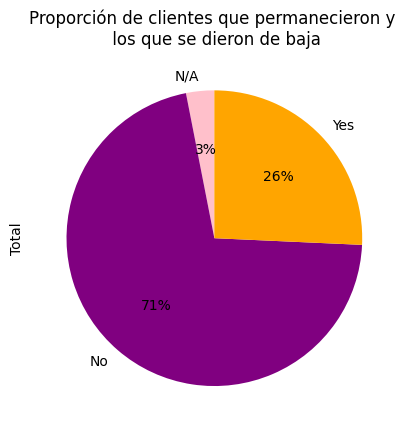

<Figure size 640x480 with 0 Axes>

In [36]:
df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['pink', 'purple','orange'])
plt.title('Proporción de clientes que permanecieron y \n los que se dieron de baja')
plt.show()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')

In [37]:
cliente_evade = df.query('Churn == "Yes"')
cliente_evade

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
2,0004-TLHLJ,Yes,Male,0,NaN,NaN,4,NaN,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,NaN,NaN,13,NaN,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,NaN,NaN,3,NaN,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
18,0022-TCJCI,Yes,Male,1,NaN,NaN,45,NaN,0,One year,...,DSL,1,0,1,0,0,1,2791.50,62.70,2.090000
19,0023-HGHWL,Yes,Male,1,NaN,NaN,1,NaN,0,Month-to-month,...,DSL,0,0,0,0,0,0,25.10,25.10,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,NaN,NaN,21,NaN,0,Month-to-month,...,Fiber optic,0,0,1,0,1,1,2030.30,96.80,3.226667
7246,9965-YOKZB,Yes,Male,1,NaN,NaN,9,NaN,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,790.15,83.85,2.795000
7260,9985-MWVIX,Yes,Female,0,NaN,NaN,1,NaN,0,Month-to-month,...,Fiber optic,0,0,0,0,0,0,70.15,70.15,2.338333
7261,9986-BONCE,Yes,Female,0,NaN,NaN,4,NaN,0,Month-to-month,...,No,0,0,0,0,0,0,85.50,20.95,0.698333


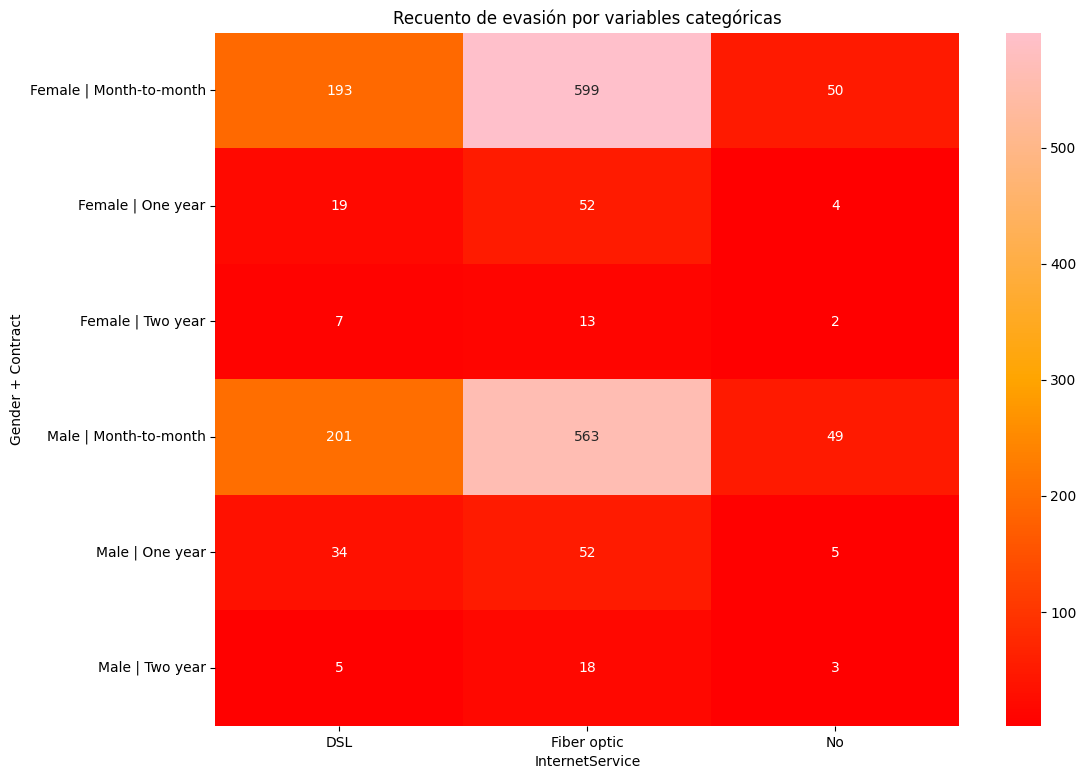

In [40]:
from matplotlib.colors import LinearSegmentedColormap
cliente_evade[['Gender','InternetService','Contract']].value_counts()
cliente_evade = cliente_evade.copy()

cliente_evade['Gender_Contract'] = cliente_evade['Gender'] + " | " + cliente_evade['Contract']

heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack()

semaforo = LinearSegmentedColormap.from_list("semaforo", ["red", "orange", "pink"])

plt.figure(figsize=(12,9))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Recuento de evasión por variables categóricas')
plt.xlabel('InternetService')
plt.ylabel('Gender + Contract')
plt.show()

In [45]:
variables_numericas = ['Churn', 'ChargesMonthly', 'Tenure']

df_evasion_num = df[variables_numericas].sort_values('Churn').set_index('Churn')
df_evasion_num

,ChargesMonthly,Tenure
Churn,,
N/A,20.65,7
N/A,60.15,51
N/A,106.30,41
N/A,70.30,1
N/A,103.30,19
...,...,...
Yes,82.05,48
Yes,69.85,1
Yes,69.55,1


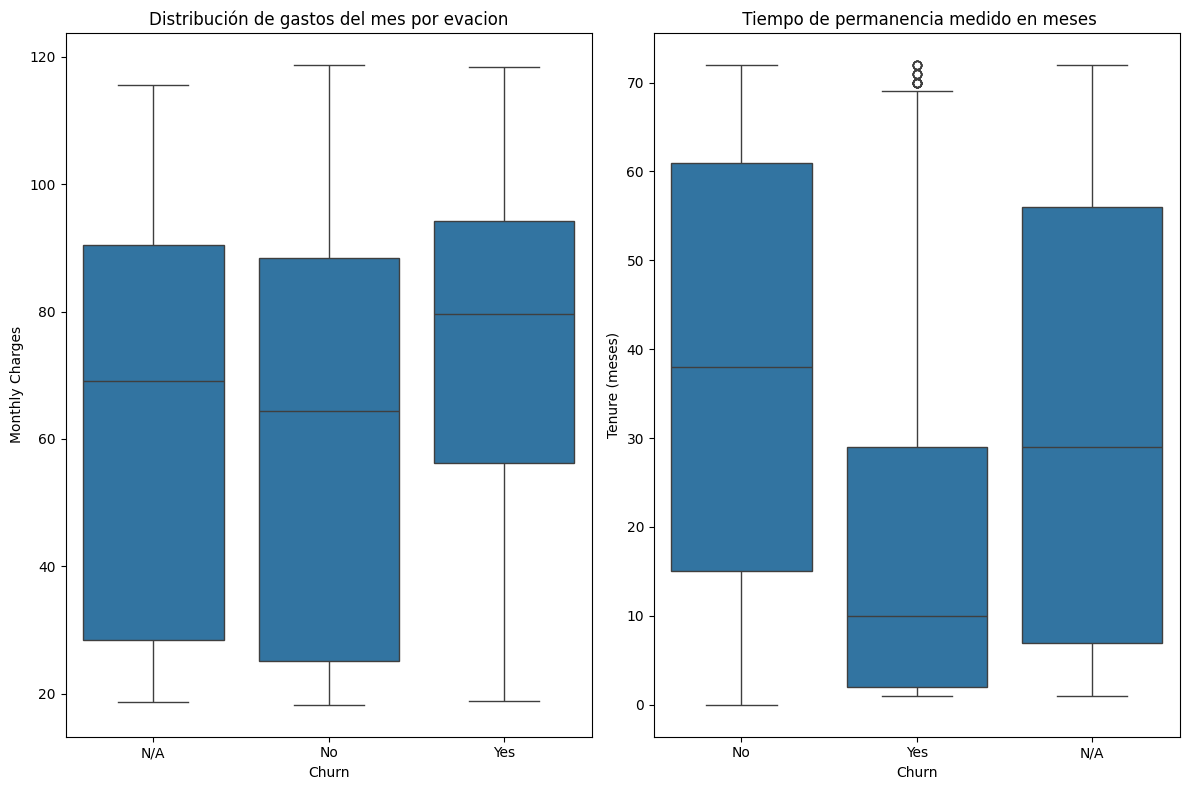

In [46]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(data=df_evasion_num, x='Churn', y='ChargesMonthly')
plt.title('Distribución de gastos del mes por evacion')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title(' Tiempo de permanencia medido en meses')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')

plt.tight_layout()
plt.show()

#📄Informe final

Fuente de los datos
https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX

## Informe Final

Basado en el análisis realizado, aquí están los hallazgos clave con respecto a la pérdida de clientes (churn):

### 1. Proporción de clientes que permanecieron y los que se dieron de baja

El gráfico circular muestra la proporción general de clientes que se dieron de baja (churn), los que no se dieron de baja y aquellos con información de churn faltante.

In [ ]:
df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['pink', 'purple','orange'])
plt.title('Proporción de clientes que permanecieron y \n los que se dieron de baja')
plt.show()

### 2. Recuento de evasión por variables categóricas (Género, Servicio de Internet y Contrato)

El mapa de calor ilustra la tasa de abandono en diferentes combinaciones de género, tipo de contrato y servicio de Internet. Esto ayuda a identificar qué grupos tienen tasas de abandono más altas.

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Recuento de evasión por variables categóricas')
plt.xlabel('InternetService')
plt.ylabel('Gender + Contract')
plt.show()

### 3. Distribución de gastos mensuales y tiempo de permanencia por Churn

Los diagramas de caja muestran la distribución de los cargos mensuales y la tenencia para los clientes que se dieron de baja y los que no. Esto ayuda a comprender si estas características numéricas están relacionadas con la pérdida de clientes.

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(data=df_evasion_num, x='Churn', y='ChargesMonthly')
plt.title('Distribución de gastos del mes por evacion')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title(' Tiempo de permanencia medido en meses')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')

plt.tight_layout()
plt.show()

Estas visualizaciones y análisis proporcionan información sobre los factores que influyen en la pérdida de clientes. Se pueden realizar más investigaciones y modelos basados en estos hallazgos para predecir y reducir la pérdida de clientes.

Conclusión

El proceso de transfornación y análisis exploratorio nos permitió identificar lo siguiente:
1. Existe una fuerte relación entre la evasión de clientes y factores como los contratos de corta duración, altos montos en los cargos mensuales y una baja antigüedad como clientes. Estos hallazgos iniciales son clave para el desarrollo de modelos predictivos de abandono (churn) y para diseñar estrategias de retención más eficaces.
2. El tipo de servicio de internet tiene un impacto significativo. Los clientes que utilizan servicios como DSL o que no cuentan con protecciones adicionales (como seguridad en línea, soporte técnico, etc) son más propensos a abandonar la compañia.